EMPLOYEE DATA
  Employee_ID  Age Department           Job_Role  Monthly_Income  \
0        E001   29      Sales    Sales Executive           45000   
1        E002   35         HR         HR Manager           52000   
2        E003   28         IT  Software Engineer           60000   
3        E004   42    Finance         Accountant           58000   
4        E005   31      Sales    Sales Executive           47000   

   Years_at_Company Overtime  Job_Satisfaction Attrition  
0                 3      Yes               4.0        No  
1                 7       No               3.0        No  
2                 2      Yes               2.0       Yes  
3                10       No               4.0        No  
4                 4      Yes               3.0       Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       15 n

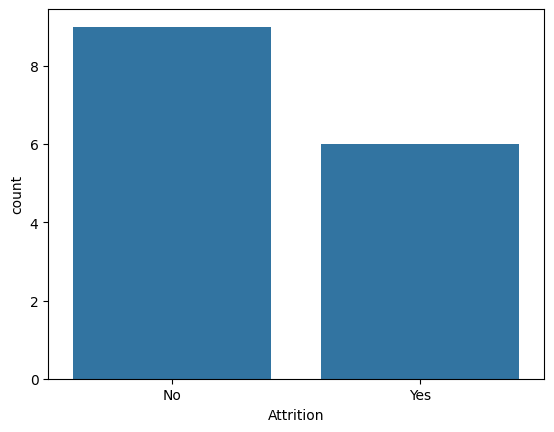

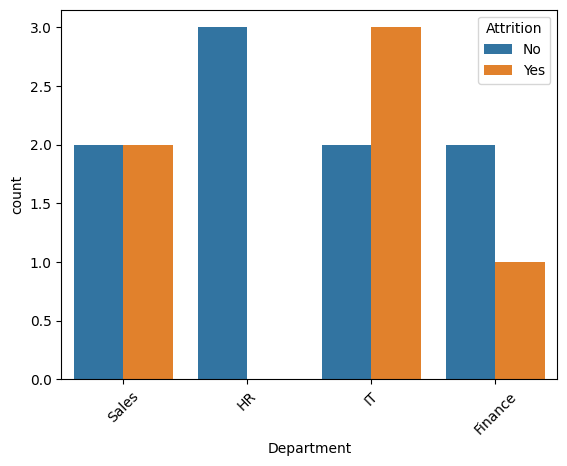

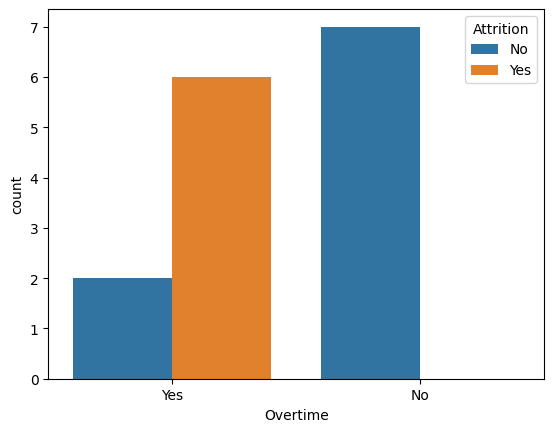

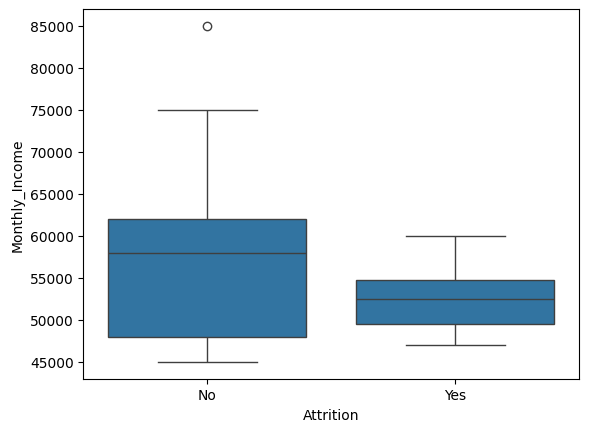

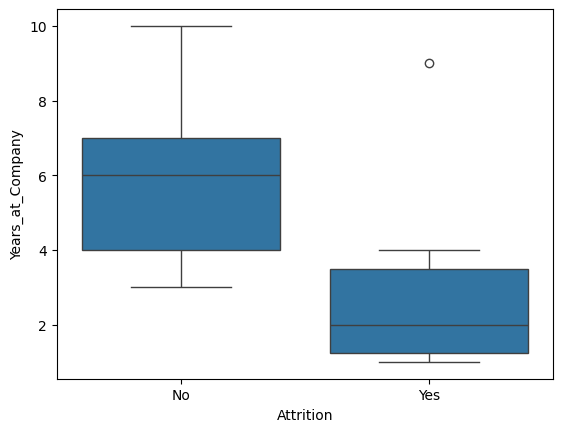

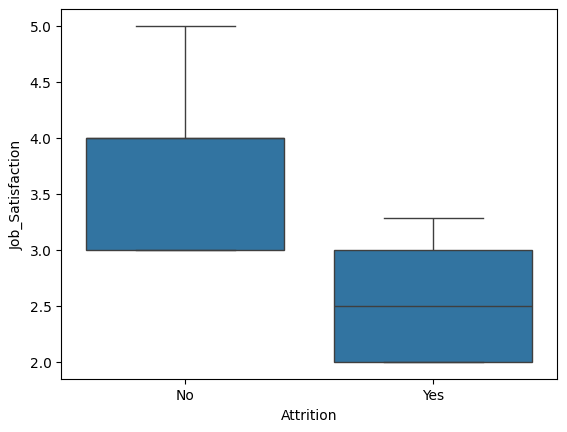

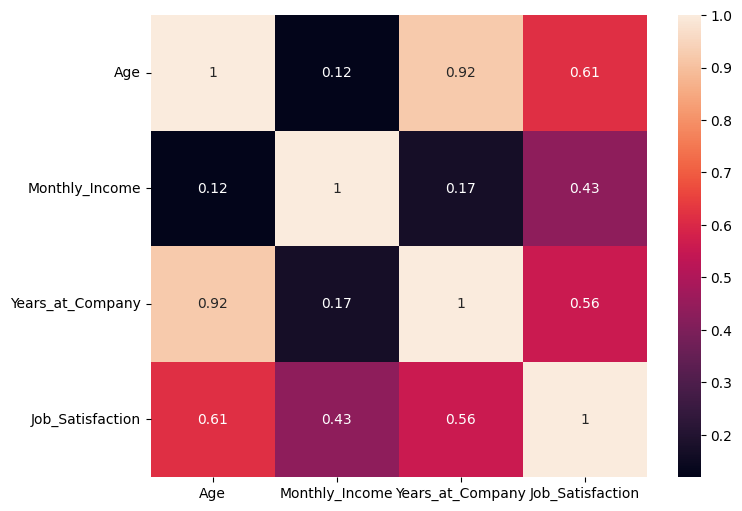

SALES DATA
  OrderID CustomerID Product  Quantity  Price   OrderDate
0   O1001       C001  Laptop         2  55000  2023-04-10
1   O1002       C002  Mobile         1  25000  2023-04-12
2   O1003       C003  Tablet         3  15000  2023-05-01
3   O1004       C004  Laptop         1  60000  2023-05-15
4   O1005       C005  Mobile         2  22000  2023-06-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     8 non-null      object
 1   CustomerID  8 non-null      object
 2   Product     8 non-null      object
 3   Quantity    8 non-null      int64 
 4   Price       8 non-null      int64 
 5   OrderDate   8 non-null      object
dtypes: int64(2), object(4)
memory usage: 516.0+ bytes
None
       Quantity         Price
count  8.000000      8.000000
mean   2.125000  31875.000000
std    1.356203  22433.632277
min    1.000000   2000.000000
25%    1.00

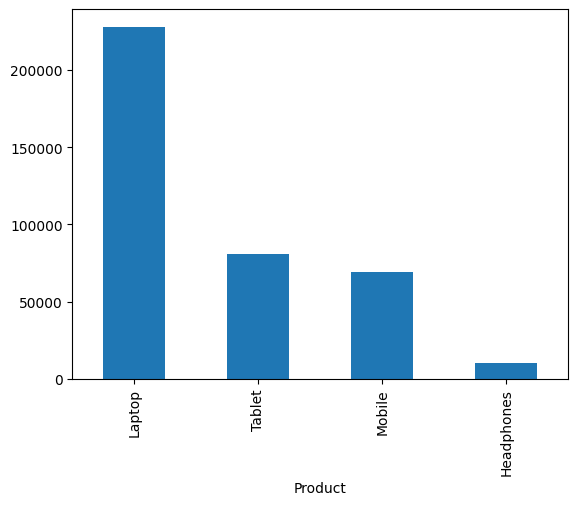

Month
2023-04    135000
2023-05    105000
2023-06     54000
2023-07     94000
Freq: M, Name: Total_Sales, dtype: int64


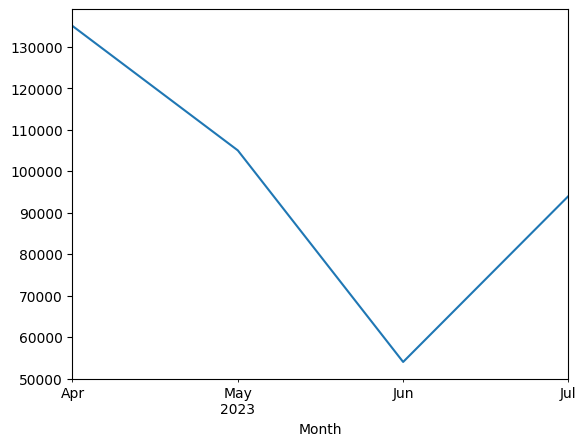

CustomerID
C001    110000
C004     60000
C007     58000
C003     45000
C005     44000
C008     36000
C002     25000
C006     10000
Name: Total_Sales, dtype: int64
TELECOM DATA
  Customer_ID  Gender  Age  Tenure_Months  Monthly_Charges   Contract_Type  \
0        C001    Male   25              6              500  Month-to-Month   
1        C002  Female   34             24              750        One Year   
2        C003    Male   45             36              820        Two Year   
3        C004  Female   29              3              600  Month-to-Month   
4        C005    Male   52             60              900        Two Year   

  Internet_Service    Payment_Method Churn  
0      Fiber Optic       Credit Card   Yes  
1              DSL     Bank Transfer    No  
2      Fiber Optic       Credit Card    No  
3              DSL  Electronic Check   Yes  
4      Fiber Optic     Bank Transfer    No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (t

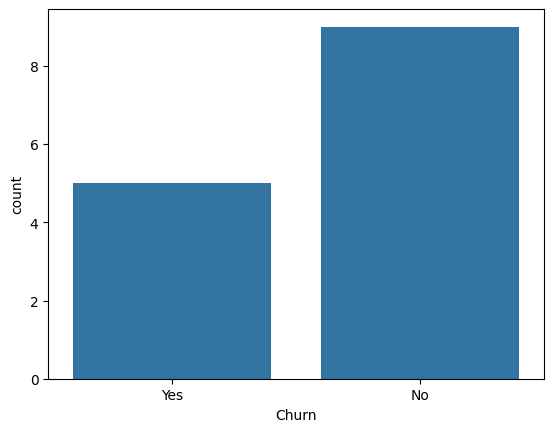

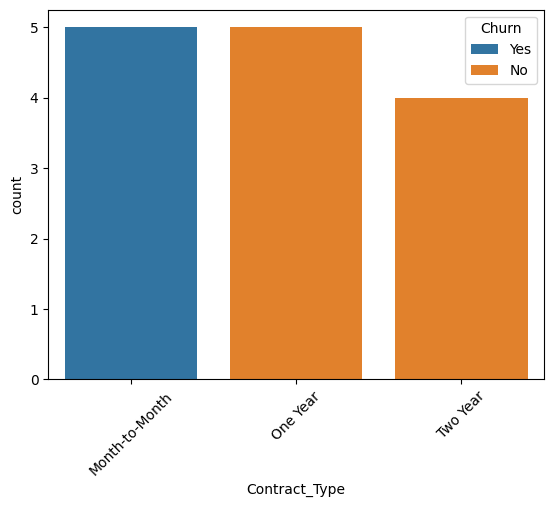

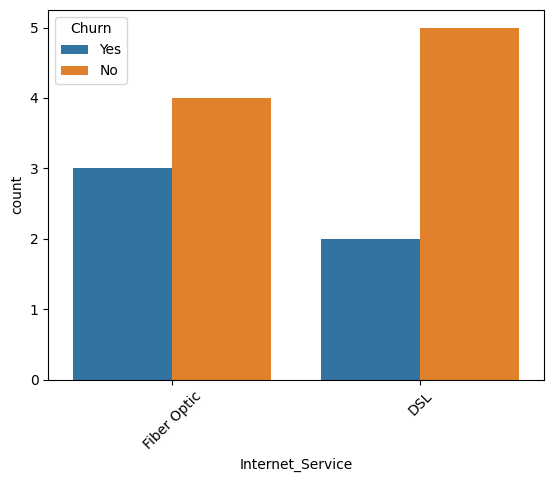

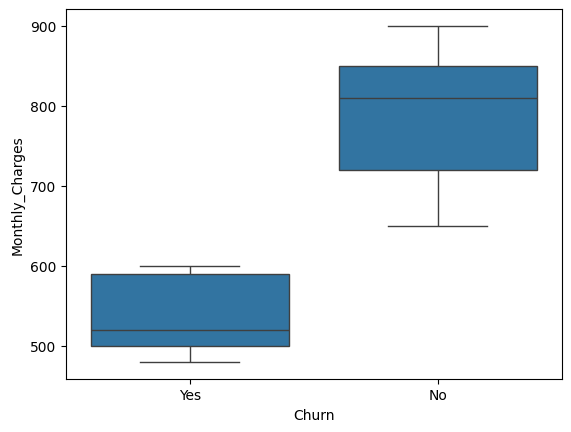

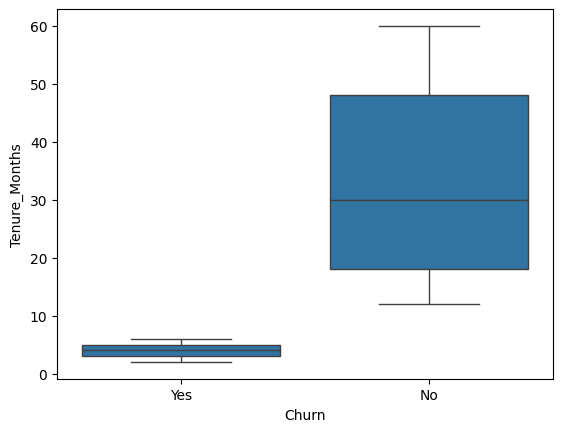

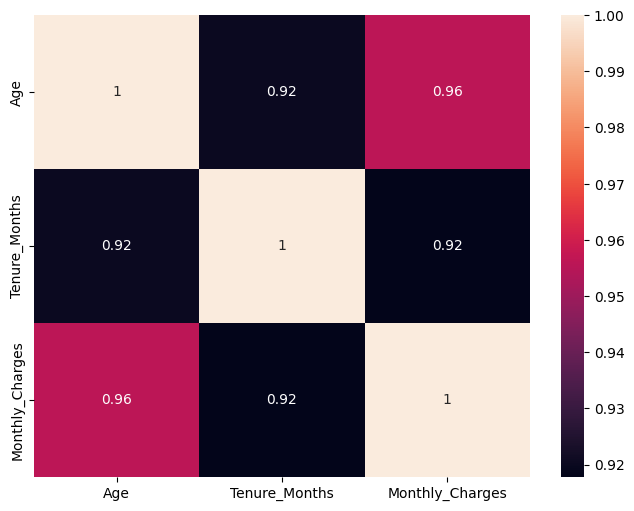

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

employee_df = pd.read_csv("employee_attrition - Sheet1.csv")
sales_df = pd.read_csv("Sales1 - Sheet1.csv")
telecom_df = pd.read_csv("telecom_churn - Sheet1.csv")

print("EMPLOYEE DATA")
print(employee_df.head())
print(employee_df.info())
print(employee_df.describe())
print(employee_df.isnull().sum())

employee_df["Job_Satisfaction"] = employee_df["Job_Satisfaction"].fillna(employee_df["Job_Satisfaction"].mean())

attrition_rate = employee_df["Attrition"].value_counts(normalize=True) * 100
print(attrition_rate)

dept_attrition = pd.crosstab(employee_df["Department"], employee_df["Attrition"], normalize="index") * 100
print(dept_attrition)

role_attrition = pd.crosstab(employee_df["Job_Role"], employee_df["Attrition"], normalize="index") * 100
print(role_attrition)

overtime_attrition = pd.crosstab(employee_df["Overtime"], employee_df["Attrition"], normalize="index") * 100
print(overtime_attrition)

plt.figure()
sns.countplot(x="Attrition", data=employee_df)
plt.show()

plt.figure()
sns.countplot(x="Department", hue="Attrition", data=employee_df)
plt.xticks(rotation=45)
plt.show()

plt.figure()
sns.countplot(x="Overtime", hue="Attrition", data=employee_df)
plt.show()

plt.figure()
sns.boxplot(x="Attrition", y="Monthly_Income", data=employee_df)
plt.show()

plt.figure()
sns.boxplot(x="Attrition", y="Years_at_Company", data=employee_df)
plt.show()

plt.figure()
sns.boxplot(x="Attrition", y="Job_Satisfaction", data=employee_df)
plt.show()

emp_corr = employee_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(emp_corr, annot=True)
plt.show()


print("SALES DATA")
print(sales_df.head())
print(sales_df.info())
print(sales_df.describe())
print(sales_df.isnull().sum())

sales_df["Total_Sales"] = sales_df["Quantity"] * sales_df["Price"]

product_sales = sales_df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
print(product_sales)

plt.figure()
product_sales.plot(kind="bar")
plt.show()

sales_df["OrderDate"] = pd.to_datetime(sales_df["OrderDate"])
sales_df["Month"] = sales_df["OrderDate"].dt.to_period("M")

monthly_sales = sales_df.groupby("Month")["Total_Sales"].sum()
print(monthly_sales)

plt.figure()
monthly_sales.plot()
plt.show()

top_customers = sales_df.groupby("CustomerID")["Total_Sales"].sum().sort_values(ascending=False)
print(top_customers)


print("TELECOM DATA")
print(telecom_df.head())
print(telecom_df.info())
print(telecom_df.describe())
print(telecom_df.isnull().sum())

telecom_df = telecom_df.fillna(telecom_df.mean(numeric_only=True))

churn_rate = telecom_df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)

contract_churn = pd.crosstab(telecom_df["Contract_Type"], telecom_df["Churn"], normalize="index") * 100
print(contract_churn)

internet_churn = pd.crosstab(telecom_df["Internet_Service"], telecom_df["Churn"], normalize="index") * 100
print(internet_churn)

payment_churn = pd.crosstab(telecom_df["Payment_Method"], telecom_df["Churn"], normalize="index") * 100
print(payment_churn)

gender_churn = pd.crosstab(telecom_df["Gender"], telecom_df["Churn"], normalize="index") * 100
print(gender_churn)

plt.figure()
sns.countplot(x="Churn", data=telecom_df)
plt.show()

plt.figure()
sns.countplot(x="Contract_Type", hue="Churn", data=telecom_df)
plt.xticks(rotation=45)
plt.show()

plt.figure()
sns.countplot(x="Internet_Service", hue="Churn", data=telecom_df)
plt.xticks(rotation=45)
plt.show()

plt.figure()
sns.boxplot(x="Churn", y="Monthly_Charges", data=telecom_df)
plt.show()

plt.figure()
sns.boxplot(x="Churn", y="Tenure_Months", data=telecom_df)
plt.show()

tel_corr = telecom_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(tel_corr, annot=True)
plt.show()